In [ ]:
# default_exp backwards
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# default_exp backwards
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create sink

In [ ]:
from directed_graphs.datasets import DirectedStochasticBlockModelHelper, visualize_heatmap, visualize_graph
import torch
import numpy as np

In [ ]:
num_clusters = 7
num_nodes=50*num_clusters
# create graph
start = [0,1,2,4,5,6]
end = [3,3,3,3,3,3]
edge_index = torch.tensor([start, end])
data = DirectedStochasticBlockModelHelper(num_nodes=num_nodes, num_clusters=7, edge_index=edge_index)[0]


In [ ]:
# save the graph
import os

folder = "trees"
file = "sink.pt"

if folder not in os.listdir():
    os.makedirs(folder)

torch.save(data, f"{folder}/{file}")

In [ ]:
# load presaved data
data = torch.load("trees/sink.pt")

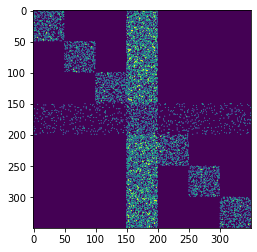

In [ ]:
visualize_heatmap(data.edge_index)

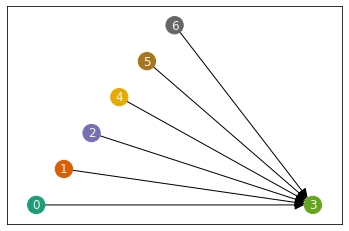

In [ ]:
from directed_graphs.datasets import visualize_edge_index
visualize_edge_index(data, num_clusters)

# Apply Backward node2vec on sink

In [ ]:
from torch_geometric.utils import to_networkx
from directed_graphs.backwards import BackwardsNode2Vec
from torch_geometric.utils import to_networkx

G_nx = to_networkx(data, to_undirected=False)
node2vec2_model = BackwardsNode2Vec(G_nx, backward_prob=0.1, p=10, q=0.5, dimensions=32, walk_length=20, num_walks=1000, workers=4)
emb = node2vec2_model.get_embeddings(window=1)
emb.shape

Computing transition probabilities:   0%|          | 0/350 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]


backward_prob = 0.1, dimension = 32, walk_length = 20, num_walks = 1000, window = 1


(350, 32)

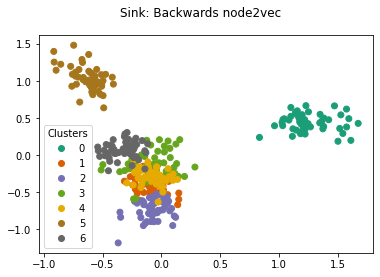

In [ ]:
from directed_graphs.datasets import plot_embeddings
plot_embeddings(emb, num_nodes, num_clusters, title="Sink: Backwards node2vec")

# Same sink with regular node2vec

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
node2vec2_model = BackwardsNode2Vec(G_nx, backward_prob=0.0, p=10, q=0.5, dimensions=32, walk_length=20, num_walks=1000, workers=4)
emb = node2vec2_model.get_embeddings(window=1)
emb.shape

Computing transition probabilities:   0%|          | 0/350 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 250/250 [00:59<00:00,  4.20it/s]


backward_prob = 0.0, dimension = 32, walk_length = 20, num_walks = 1000, window = 1


(350, 32)

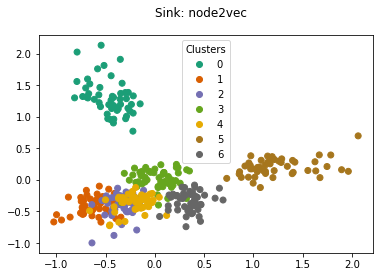

In [ ]:
plot_embeddings(emb, num_nodes, num_clusters, title="Sink: node2vec")